# CLEANSING DATA

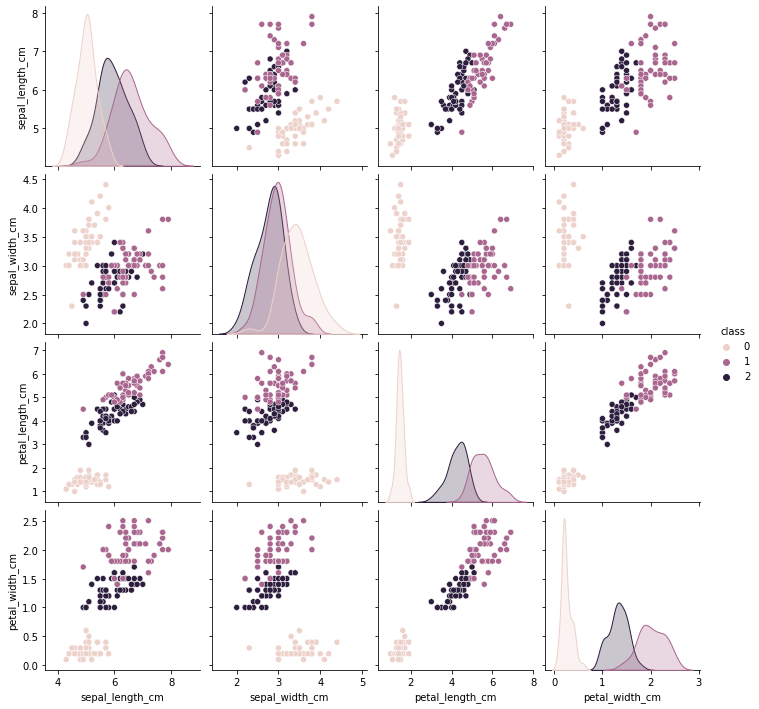

0.9459459459459459
[0]
0.918918918918919


In [2]:
# import everything
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#We are going to use built-in datasets from `sklearn` for this example.


from sklearn import datasets

iris_data = pd.read_csv('iris-data-clean.csv')
iris_data.tail()

df = pd.DataFrame(iris_data, 
                columns=['sepal_length_cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm', 'class'])
df = pd.DataFrame(iris_data)
df.tail

def myfunction(x):
    if x == "Setosa":
        return 0
    elif x == "Virginica":
        return 1
    else:
        return 2
    
df["class"] = df["class"].apply(myfunction)

# we are going to use the fours features (sepal & petal - length & petal width) 
X = df.iloc[:,0:4]

# use 'class' as the target we're trying to predict
y = df['class']
X.head()

# Visualize the Data
sb.pairplot (df, hue='class')  # Show different levels of a categorical variable by the color of plot elements
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# we choose k = 3 here, due to the small number of data we have
# there isn't a k suitable for all. Generally we want to choose a small odd number.
# large k is generally more costy
knn_model = KNeighborsClassifier(n_neighbors = 3) 

knn_model.fit(X_train, y_train) # train our model to the data set we have. The training set is all the data points

y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

# we can use this model to predict any data values
print(knn_model.predict([[4.9, 3.5, 1.6, 0.25]]))

X2 = df.iloc[:, 2:4] 
y2 = df['class']

df_zero = df.loc[df['class'] == 0]
df_one = df.loc[df['class'] == 1]
df_two = df.loc[df['class'] == 2]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state = 42)

knn_model2 = KNeighborsClassifier(n_neighbors = 3) 

knn_model2.fit(X2_train, y2_train)

y2_pred = knn_model2.predict(X2_test)

print(accuracy_score(y2_test, y2_pred))